In [4]:
import pandas as pd
from collections import defaultdict
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.metrics import multilabel_confusion_matrix

In [5]:
dfx = pd.read_csv("dfx.csv")

Deleting one row MBC

In [6]:
dfx_noMBC = dfx[dfx['Oncotree Code']!='MBC']

In [7]:
dfx.head()

,Unnamed: 0,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,...,DA110839,FAM71A,Cancer Type Detailed,ER Status,HER2 Status,Neoplasm Histologic Grade,Oncotree Code,PR Status,Tumor Size,Tumor Stage
0,MB-0362,8.676978,6.075331,5.453928,4.994525,5.838270,6.397503,7.906217,5.259461,5.702379,...,5.251843,5.049591,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,18.0,2.0
1,MB-0346,9.653589,6.687887,5.454185,5.346010,5.600876,5.246319,8.267256,5.380069,5.521794,...,5.450611,5.316790,Breast Invasive Ductal Carcinoma,Negative,Positive,3.0,IDC,Negative,16.0,2.0
2,MB-0386,9.033589,5.910885,5.501577,5.247467,6.030718,10.111816,7.959291,5.262024,5.689533,...,5.235394,5.461617,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,15.0,3.0
3,MB-0574,8.814855,5.628740,5.471941,5.316523,5.849428,6.116868,9.206376,5.396576,5.439130,...,5.091927,5.227130,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,21.0,2.0
4,MB-0503,9.274265,5.908698,5.531743,5.244094,5.964661,7.828171,8.706646,5.167213,5.417484,...,5.315224,5.027476,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,23.0,2.0


In [8]:
dfx_only_stage = dfx_noMBC.drop(['Unnamed: 0','Cancer Type Detailed','ER Status','HER2 Status','Neoplasm Histologic Grade','Oncotree Code','PR Status','Tumor Size'],axis=1)

In [9]:
dfx_only_stage.head()
#Where OncoTreeCode is NA
# dfx_only_onc = dfx_only_onc[np.isfinite(dfx_only_onc['Oncotree Code'])]
# dfx_only_onc['Oncotree Code'].isnull().values.any()
dfx_only_stage = dfx_only_stage[pd.notnull(dfx_only_stage['Tumor Stage'])]
dfx_only_stage['Tumor Stage'].isnull().values.any()

False

In [10]:
dfx_only_stage.head()

,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A,Tumor Stage
0,8.676978,6.075331,5.453928,4.994525,5.838270,6.397503,7.906217,5.259461,5.702379,6.930741,...,5.680321,7.688492,8.084979,5.161796,6.353215,4.836483,7.304643,5.251843,5.049591,2.0
1,9.653589,6.687887,5.454185,5.346010,5.600876,5.246319,8.267256,5.380069,5.521794,6.141689,...,5.461069,7.804165,8.349115,5.197392,6.132355,5.316819,7.933324,5.450611,5.316790,2.0
2,9.033589,5.910885,5.501577,5.247467,6.030718,10.111816,7.959291,5.262024,5.689533,6.529312,...,5.304030,7.934309,8.406332,8.087722,6.366335,5.466419,7.580336,5.235394,5.461617,3.0
3,8.814855,5.628740,5.471941,5.316523,5.849428,6.116868,9.206376,5.396576,5.439130,6.430102,...,5.632249,7.744562,8.310019,5.780062,6.424048,5.193150,6.903654,5.091927,5.227130,2.0
4,9.274265,5.908698,5.531743,5.244094,5.964661,7.828171,8.706646,5.167213,5.417484,6.684893,...,5.472185,7.701394,8.137014,5.498185,6.214301,5.274600,6.839417,5.315224,5.027476,2.0


In [11]:
X = dfx_only_stage.loc[:, dfx_only_stage.columns != 'Tumor Stage']
Y = dfx_only_stage['Tumor Stage']
X

,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A
0,8.676978,6.075331,5.453928,4.994525,5.838270,6.397503,7.906217,5.259461,5.702379,6.930741,...,5.271343,5.680321,7.688492,8.084979,5.161796,6.353215,4.836483,7.304643,5.251843,5.049591
1,9.653589,6.687887,5.454185,5.346010,5.600876,5.246319,8.267256,5.380069,5.521794,6.141689,...,5.942887,5.461069,7.804165,8.349115,5.197392,6.132355,5.316819,7.933324,5.450611,5.316790
2,9.033589,5.910885,5.501577,5.247467,6.030718,10.111816,7.959291,5.262024,5.689533,6.529312,...,5.174498,5.304030,7.934309,8.406332,8.087722,6.366335,5.466419,7.580336,5.235394,5.461617
3,8.814855,5.628740,5.471941,5.316523,5.849428,6.116868,9.206376,5.396576,5.439130,6.430102,...,5.116749,5.632249,7.744562,8.310019,5.780062,6.424048,5.193150,6.903654,5.091927,5.227130
4,9.274265,5.908698,5.531743,5.244094,5.964661,7.828171,8.706646,5.167213,5.417484,6.684893,...,5.402314,5.472185,7.701394,8.137014,5.498185,6.214301,5.274600,6.839417,5.315224,5.027476
5,9.286585,6.206729,5.372668,5.167365,5.783374,8.744149,8.518929,5.228937,5.629885,5.632753,...,5.489447,5.543384,7.690236,8.009209,5.408243,6.175542,5.299248,6.326814,5.543680,5.086662
6,8.437347,6.095592,5.693519,5.189106,5.737572,5.480091,7.478413,5.430230,5.686286,5.866132,...,5.357598,5.325600,7.837494,8.818098,5.291289,6.003532,5.555575,8.375567,5.444825,4.991999
7,8.569973,6.383530,5.401276,5.416517,5.923928,5.671577,8.410583,5.200576,5.770271,7.403098,...,5.415931,5.346443,7.360295,7.969567,5.104648,6.501156,5.241082,6.534520,5.420087,5.493967
8,8.892102,5.773691,5.567946,5.339133,5.902223,5.509498,7.779545,5.383724,5.510622,6.881749,...,5.733573,5.504519,7.679597,8.721196,5.218413,6.617991,5.220612,7.143399,5.307056,5.062520
9,8.922748,6.461321,5.410957,5.389980,5.536764,7.196945,8.385897,5.397070,5.594352,6.484873,...,5.412129,5.597104,8.096537,8.073800,5.220937,6.262962,5.234383,7.149541,5.174048,5.583954


In [12]:
Y

0       2.0
1       2.0
2       3.0
3       2.0
4       2.0
5       2.0
6       1.0
7       2.0
8       2.0
9       4.0
10      2.0
11      2.0
12      2.0
13      1.0
14      1.0
15      2.0
16      1.0
17      2.0
18      2.0
19      2.0
20      1.0
21      1.0
22      2.0
23      2.0
24      2.0
25      1.0
26      1.0
27      2.0
28      2.0
29      2.0
       ... 
1853    2.0
1854    2.0
1855    2.0
1856    1.0
1857    1.0
1858    2.0
1859    1.0
1860    2.0
1861    1.0
1862    2.0
1863    1.0
1864    2.0
1866    2.0
1867    2.0
1868    2.0
1869    2.0
1879    2.0
1882    1.0
1884    1.0
1886    2.0
1889    2.0
1891    2.0
1892    2.0
1896    2.0
1897    2.0
1898    2.0
1899    2.0
1900    1.0
1901    2.0
1902    2.0
Name: Tumor Stage, Length: 1402, dtype: float64

Finding number of unique values

In [13]:
np.unique(Y, return_counts=True)

(array([0., 1., 2., 3., 4.]), array([  4, 474, 800, 115,   9], dtype=int64))

Imputing missing values

In [14]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_impu = imp.fit_transform(X)
X_impu = pd.DataFrame(X_impu, columns=X.columns)


In [15]:
X_impu

,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A
0,8.676978,6.075331,5.453928,4.994525,5.838270,6.397503,7.906217,5.259461,5.702379,6.930741,...,5.271343,5.680321,7.688492,8.084979,5.161796,6.353215,4.836483,7.304643,5.251843,5.049591
1,9.653589,6.687887,5.454185,5.346010,5.600876,5.246319,8.267256,5.380069,5.521794,6.141689,...,5.942887,5.461069,7.804165,8.349115,5.197392,6.132355,5.316819,7.933324,5.450611,5.316790
2,9.033589,5.910885,5.501577,5.247467,6.030718,10.111816,7.959291,5.262024,5.689533,6.529312,...,5.174498,5.304030,7.934309,8.406332,8.087722,6.366335,5.466419,7.580336,5.235394,5.461617
3,8.814855,5.628740,5.471941,5.316523,5.849428,6.116868,9.206376,5.396576,5.439130,6.430102,...,5.116749,5.632249,7.744562,8.310019,5.780062,6.424048,5.193150,6.903654,5.091927,5.227130
4,9.274265,5.908698,5.531743,5.244094,5.964661,7.828171,8.706646,5.167213,5.417484,6.684893,...,5.402314,5.472185,7.701394,8.137014,5.498185,6.214301,5.274600,6.839417,5.315224,5.027476
5,9.286585,6.206729,5.372668,5.167365,5.783374,8.744149,8.518929,5.228937,5.629885,5.632753,...,5.489447,5.543384,7.690236,8.009209,5.408243,6.175542,5.299248,6.326814,5.543680,5.086662
6,8.437347,6.095592,5.693519,5.189106,5.737572,5.480091,7.478413,5.430230,5.686286,5.866132,...,5.357598,5.325600,7.837494,8.818098,5.291289,6.003532,5.555575,8.375567,5.444825,4.991999
7,8.569973,6.383530,5.401276,5.416517,5.923928,5.671577,8.410583,5.200576,5.770271,7.403098,...,5.415931,5.346443,7.360295,7.969567,5.104648,6.501156,5.241082,6.534520,5.420087,5.493967
8,8.892102,5.773691,5.567946,5.339133,5.902223,5.509498,7.779545,5.383724,5.510622,6.881749,...,5.733573,5.504519,7.679597,8.721196,5.218413,6.617991,5.220612,7.143399,5.307056,5.062520
9,8.922748,6.461321,5.410957,5.389980,5.536764,7.196945,8.385897,5.397070,5.594352,6.484873,...,5.412129,5.597104,8.096537,8.073800,5.220937,6.262962,5.234383,7.149541,5.174048,5.583954


Feature Selection

# Using 2000 features

In [14]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(chi2, k=2000)
selector.fit(X_impu, Y)
cols = selector.get_support(indices=True)
X_new = X_impu.iloc[:,cols]
# X_new

In [15]:
print("the shape of new data is: ",X_new.shape)

the shape of new data is:  (1402, 2000)


Resampling

In [16]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42,k_neighbors=3, sampling_strategy='auto')
X_s, y_s = sm.fit_resample(X_new, Y)
print('Resampled dataset shape after running SMOTE algorithm for Data Oversampling %s' % Counter(y_s))

Resampled dataset shape after running SMOTE algorithm for Data Oversampling Counter({0.0: 800, 1.0: 800, 2.0: 800, 3.0: 800, 4.0: 800})


Training Testing Split

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2)
print ("the shape of training data is ",X_train.shape, y_train.shape)
print ("the shape of testing data is ",X_test.shape, y_test.shape)

the shape of training data is  (3200, 2000) (3200,)
the shape of testing data is  (800, 2000) (800,)


In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

In [30]:
clf = SVC(kernel="linear", C=1)
#79 before
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))
score = clf.score(X_test, y_test)

print(score)


[[[634   0]
  [  0 166]]

 [[604  46]
  [ 18 132]]

 [[628  14]
  [ 54 104]]

 [[623  12]
  [  0 165]]

 [[639   0]
  [  0 161]]]
0.91


In [29]:
clf = SVC(kernel='rbf', gamma=0.001)
 #86
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))
score = clf.score(X_test, y_test)
print(score)

[[[634   0]
  [  0 166]]

 [[619  31]
  [ 35 115]]

 [[603  39]
  [ 32 126]]

 [[634   1]
  [  4 161]]

 [[639   0]
  [  0 161]]]
0.91125


In [21]:
clf = LogisticRegression()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))
score = clf.score(X_test, y_test)
print(score)

[[[634   0]
  [  0 166]]

 [[605  45]
  [ 52  98]]

 [[586  56]
  [ 59  99]]

 [[606  29]
  [ 20 145]]

 [[638   1]
  [  0 161]]]
0.83625


c:\users\nimis\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
clf = GaussianNB()
#0.568 before
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))
score = clf.score(X_test, y_test)
print(score)

[[[634   0]
  [  0 166]]

 [[530 120]
  [ 66  84]]

 [[592  50]
  [ 95  63]]

 [[550  85]
  [ 82  83]]

 [[637   2]
  [ 14 147]]]
0.67875


### Ensemble 

In [26]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [33]:
lr = LogisticRegression(max_iter = 20)
svm_linear = SVC(kernel='linear',C=1)
svm = SVC(kernel = 'rbf', gamma=0.001)
gnb =  GaussianNB()
evc = VotingClassifier( estimators= [('svm_linear',svm_linear),('lr',lr),('svm',svm)], voting = 'hard')
evc.fit(X_train,y_train)
evc.score(X_test, y_test)

c:\users\nimis\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9025

In [35]:
y_pred = evc.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))


[[[633   1]
  [  0 166]]

 [[603  47]
  [ 24 126]]

 [[620  22]
  [ 51 107]]

 [[627   8]
  [  3 162]]

 [[639   0]
  [  0 161]]]


# Using 5000 features

In [41]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(chi2, k=5000)
selector.fit(X_impu, Y)
cols = selector.get_support(indices=True)
X_new = X_impu.iloc[:,cols]

In [17]:
print("the shape of new data is: ",X_new.shape)

the shape of new data is:  (1402, 5000)


Resampling

Resampled dataset shape after running SMOTE algorithm for Data Oversampling Counter({0.0: 800, 1.0: 800, 2.0: 800, 3.0: 800, 4.0: 800})


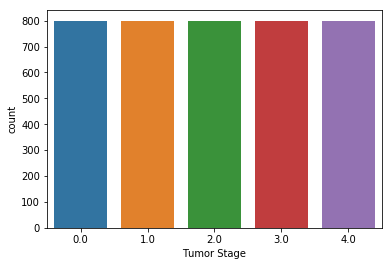

In [18]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42,k_neighbors=3, sampling_strategy='auto')
X_s, y_s = sm.fit_resample(X_new, Y)
print('Resampled dataset shape after running SMOTE algorithm for Data Oversampling %s' % Counter(y_s))
dfffff = pd.DataFrame(X_s)
dfffff = pd.concat([dfffff,y_s],axis=1)
sns.countplot(dfffff['Tumor Stage'])

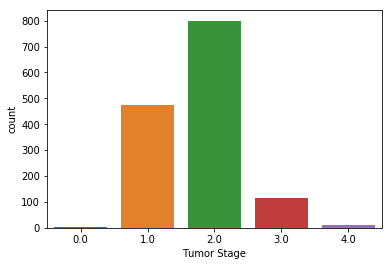

In [19]:
sns.countplot(dfx['Tumor Stage'])

Training Testing Split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2)
print ("the shape of training data is ",X_train.shape, y_train.shape)
print ("the shape of testing data is ",X_test.shape, y_test.shape)

the shape of training data is  (3200, 5000) (3200,)
the shape of testing data is  (800, 5000) (800,)


In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [40]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))
score = clf.score(X_test, y_test)
print(score)

[[[640   0]
  [  0 160]]

 [[595  33]
  [ 42 130]]

 [[605  44]
  [ 33 118]]

 [[651   1]
  [  3 145]]

 [[631   0]
  [  0 169]]]
0.9025


In [43]:
feature_importances = zip(cols, clf.feature_importances_)
feature_importances = sorted(feature_importances, key = lambda x:x[1],reverse = True)
for x, y in feature_importances[:10]:
    print (dfx.columns[x],y)

GLO1 0.009745956699717229
LOC642131 0.006886790190241279
DNASE1 0.00673146182768197
MLYCD 0.0061461149312256515
MT1B 0.005727373445084619
AI493040 0.004784606980698459
BX089476 0.004706587097521766
IQCE 0.00422931052364705
BE221779 0.004139129465569277
CNIH2 0.00401258021274279


In [27]:
clf = SVC(kernel="linear", C=1)
#79 before
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))
score = clf.score(X_test, y_test)
print(score)

[[[631   0]
  [  0 169]]

 [[597  55]
  [ 22 126]]

 [[615  22]
  [ 62 101]]

 [[637   7]
  [  0 156]]

 [[636   0]
  [  0 164]]]
0.895


In [28]:
clf = SVC(kernel='rbf', gamma=0.001)
 #81.21 before, 0.715 0.05 gamma, 99.006 0.001 gamma
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))
score = clf.score(X_test, y_test)
print(score)

[[[631   0]
  [  0 169]]

 [[641  11]
  [ 37 111]]

 [[594  43]
  [ 11 152]]

 [[644   0]
  [  6 150]]

 [[636   0]
  [  0 164]]]
0.9325


In [29]:
clf = LogisticRegression()

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))
print(score)

[[[631   0]
  [  0 169]]

 [[599  53]
  [ 56  92]]

 [[575  62]
  [ 62 101]]

 [[613  31]
  [ 28 128]]

 [[636   0]
  [  0 164]]]
0.8175


c:\users\nimis\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
clf = GaussianNB()
#0.568 before
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))
score = clf.score(X_test, y_test)

print(score)

[[[631   0]
  [  1 168]]

 [[548 104]
  [ 70  78]]

 [[580  57]
  [ 85  78]]

 [[583  61]
  [ 56 100]]

 [[636   0]
  [ 10 154]]]
0.7225


### Ensemble 

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [32]:
lr = LogisticRegression(max_iter = 20)
svm_linear = SVC(kernel='linear',C=1)
rf = RandomForestClassifier()
svm = SVC(kernel = 'rbf', gamma=0.001)
evc = VotingClassifier( estimators= [('svm_linear',svm_linear),('lr',lr),('svm',svm),('rf',rf)], voting = 'hard')
evc.fit(X_train,y_train)
evc.score(X_test, y_test)

c:\users\nimis\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.90875

In [47]:
y_pred = evc.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))


[[[634   1]
  [  0 165]]

 [[608  44]
  [ 33 115]]

 [[602  32]
  [ 50 116]]

 [[627   6]
  [  0 167]]

 [[646   0]
  [  0 154]]]


# Dimensionality Reduction and Plot

In [23]:
from sklearn.decomposition import KernelPCA,PCA
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_impu)
X_reduced.shape

(1402, 3)

In [24]:
Counter(Y)

Counter({0.0: 4, 1.0: 474, 2.0: 800, 3.0: 115, 4.0: 9})

In [25]:
Y.iloc[1374]

2.0

In [26]:
# y_num = Y.apply(['IDC','ILC','MDLC','BREAST','IMMC'].index)

In [27]:
x_nen=pd.DataFrame(data=X_reduced[0:,0:],index=[i for i in range(X_reduced.shape[0])],columns=['f'+str(i) for i in range(X_reduced.shape[1])])

In [28]:
x_nen = x_nen.reset_index()
y = Y.reset_index()

In [29]:
x_nen = pd.concat([x_nen,y],axis=1)
x_nen.drop(['index'],axis=1)

,f0,f1,f2,Tumor Stage
0,16.362728,-10.723859,-6.409640,2.0
1,-3.133136,18.816966,29.493702,2.0
2,-2.068237,-9.492751,-15.613700,3.0
3,19.779391,-7.636735,8.255147,2.0
4,8.256084,-13.611874,-11.607765,2.0
5,-19.080586,-18.003725,-40.916078,2.0
6,-22.899146,-1.937459,-5.492013,1.0
7,11.773443,-12.895971,16.489905,2.0
8,-47.725226,21.625753,10.453910,2.0
9,-16.969207,-18.848901,-18.202312,4.0


In [30]:
idcs = x_nen[x_nen['Tumor Stage'] == 0]
ilcs = x_nen[x_nen['Tumor Stage'] == 1]
mdlcs = x_nen[x_nen['Tumor Stage'] == 2]
brs = x_nen[x_nen['Tumor Stage'] == 3]
immcs = x_nen[x_nen['Tumor Stage'] == 4]
# idcs.shape


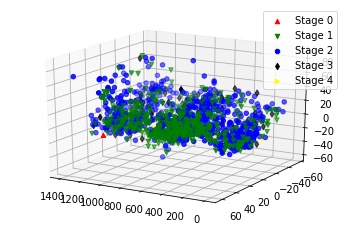

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(idcs.iloc[:,0],idcs.iloc[:,1],idcs.iloc[:,2],c='r',marker='^',label='Stage 0')
ax.scatter(ilcs.iloc[:,0],ilcs.iloc[:,1],ilcs.iloc[:,2],c='green',marker='v',label='Stage 1')
ax.scatter(mdlcs.iloc[:,0],mdlcs.iloc[:,1],mdlcs.iloc[:,2],c='blue',marker='o',label='Stage 2')
ax.scatter(brs.iloc[:,0],brs.iloc[:,1],brs.iloc[:,2],c='black',marker='d',label='Stage 3')
ax.scatter(immcs.iloc[:,0],immcs.iloc[:,1],immcs.iloc[:,2],c='yellow',marker='>',label='Stage 4')

ax.legend()
ax.view_init(20, 120)

plt.savefig('Tumorstage PCA.png')

# Using resampled data

In [31]:
from sklearn.decomposition import KernelPCA,PCA
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_s)
X_reduced.shape

(4000, 3)

In [32]:
# y_num = y_s.apply(['IDC','ILC','MDLC','BREAST','IMMC'].index)

In [33]:
x_nen=pd.DataFrame(data=X_reduced[0:,0:],index=[i for i in range(X_reduced.shape[0])],columns=['f'+str(i) for i in range(X_reduced.shape[1])])

In [36]:
x_nen = x_nen.reset_index()
y = y_s.reset_index()


In [37]:
x_nen = pd.concat([x_nen,y],axis=1)
x_nen.drop(['index'],axis=1)

,f0,f1,f2,Tumor Stage
0,11.777093,-12.592391,0.284771,2.0
1,-0.131456,30.364944,18.968824,2.0
2,-6.082801,-16.789407,-0.788201,3.0
3,17.542554,-9.159617,8.512167,2.0
4,4.263865,-17.278190,-0.965070,2.0
5,-21.159687,-19.064077,-17.647929,2.0
6,-18.816525,2.614909,2.669797,1.0
7,11.773458,-7.198665,2.322100,2.0
8,-39.303804,19.544731,15.355025,2.0
9,-17.167660,-14.078851,-15.788293,4.0


In [38]:
idcs = x_nen[x_nen['Tumor Stage'] == 0]
ilcs = x_nen[x_nen['Tumor Stage'] == 1]
mdlcs = x_nen[x_nen['Tumor Stage'] == 2]
brs = x_nen[x_nen['Tumor Stage'] == 3]
immcs = x_nen[x_nen['Tumor Stage'] == 4]
# idcs.shape

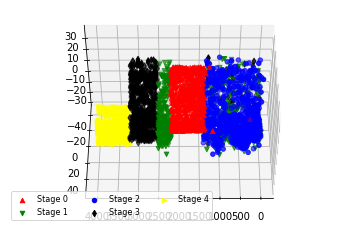

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(idcs.iloc[:,0],idcs.iloc[:,1],idcs.iloc[:,2],c='r',marker='^',label='Stage 0 ')
ax.scatter(ilcs.iloc[:,0],ilcs.iloc[:,1],ilcs.iloc[:,2],c='green',marker='v',label='Stage 1')
ax.scatter(mdlcs.iloc[:,0],mdlcs.iloc[:,1],mdlcs.iloc[:,2],c='blue',marker='o',label='Stage 2')
ax.scatter(brs.iloc[:,0],brs.iloc[:,1],brs.iloc[:,2],c='black',marker='d',label='Stage 3')
ax.scatter(immcs.iloc[:,0],immcs.iloc[:,1],immcs.iloc[:,2],c='yellow',marker='>',label='Stage 4')


ax.view_init(50, 90)

ax.legend(scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.savefig('TumorStage SMOTE PCA.png')